In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from matplotlib.pyplot import figure
from datetime import datetime  
from datetime import timedelta 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [3]:
def insert_columns (data,fields):
    fields_name = fields.columns
    index = len(data.columns)
    for i in range(len(fields_name)):
        data.insert(index + i,fields_name[i],fields[fields_name[i]],True)
    return data

In [4]:
filepath = 'DMC20_Data/'

In [5]:
data_pd = pd.read_csv(filepath + 'new_granularity_3.csv', sep=',')
infos_pd = pd.read_csv(filepath + 'infos.csv', sep='|')

last_column = pd.DataFrame(data_pd.iloc[:,-1])

In [6]:
data_pd

itemID  brand  manufacturer  customerRating  category1  category2  \
0           29    0.0          12.0             4.6        1.0        6.0   
1           35    0.0           5.0             5.0        1.0        1.0   
2           38    0.0           3.0             0.0        1.0        6.0   
3           40    0.0           6.0             4.0        1.0        5.0   
4           42    0.0           5.0             1.0        1.0        4.0   
...        ...    ...           ...             ...        ...        ...   
500300   10334  231.0         245.0             5.0        8.0       44.0   
500301   10336  231.0         245.0             0.0        8.0       44.0   
500302   10392  268.0         229.0             0.0        8.0       43.0   
500303   10431  180.0         128.0             5.0        8.0       44.0   
500304   10449  180.0         128.0             0.0        8.0       44.0   

        category3  recommendedRetailPrice  orders_coef  salesPrice_coef  \
0             1.0                   29.19     0.000000         0.000000   
1             1.0                  173.86   -54.785714        -0.022000   
2             1.0                   20.28     0.035714        -0.530220   
3             1.0                  442.51     0.000000        -0.253244   
4             1.0                   28.48     0.000000         0.000000   
...           ...                     ...          ...              ...   
500300        8.0                  230.34     0.000000         0.000000   
500301        8.0                  366.45     0.000000         0.000000   
500302        8.0                   11.47     0.000000         0.000000   
500303        8.0                  214.59    -5.464286         0.000000   
500304        8.0                  161.50    -1.285714         0.031446   

        ordersInLW  meanSalesPrice  minSalesPriceLW  maxSalesPriceLW  \
0              0.0        1.000000         1.000000         1.000000   
1            550.0        2.083170         2.014724         2.117393   
2              1.0        1.525641         1.525641         1.525641   
3              9.0        1.818196         1.818196         1.818196   
4              0.0        1.000000         1.000000         1.000000   
...            ...             ...              ...              ...   
500300         0.0        1.000000         1.000000         1.000000   
500301         0.0        1.000000         1.000000         1.000000   
500302         0.0        1.000000         1.000000         1.000000   
500303        51.0        1.162589         1.162589         1.162589   
500304        14.0        1.069040         1.020124         1.166873   

        salesPrice  salesInBlock  
0        56.130000             4  
1       350.280000           173  
2        30.940000           164  
3       809.710000             5  
4        17.720000             3  
...            ...           ...  
500300   27.752727            11  
500301  127.230000            10  
500302    6.800000             1  
500303  249.480000            19  
500304  188.450000            52  

[500305 rows x 16 columns]

In [7]:
infos_pd.drop(columns = 'promotion', inplace = True)

In [8]:
data_pd.drop(columns = ['salesInBlock'], inplace = True)

In [9]:
data_pd['brand'] = data_pd['brand'].astype('category')
data_pd['manufacturer'] = data_pd['manufacturer'].astype('category')
data_pd['category1'] = data_pd['category1'].astype('category')
data_pd['category2'] = data_pd['category2'].astype('category')
data_pd['category3'] = data_pd['category3'].astype('category')

In [10]:
data_pd['brand'].values

[0.0, 0.0, 0.0, 0.0, 0.0, ..., 231.0, 231.0, 268.0, 180.0, 180.0]
Length: 500305
Categories (267, float64): [0.0, 1.0, 2.0, 3.0, ..., 265.0, 268.0, 269.0, 271.0]

In [11]:
data_pd = insert_columns(data_pd, last_column )

In [12]:
data_pd

itemID  brand manufacturer  customerRating category1 category2  \
0           29    0.0         12.0             4.6       1.0       6.0   
1           35    0.0          5.0             5.0       1.0       1.0   
2           38    0.0          3.0             0.0       1.0       6.0   
3           40    0.0          6.0             4.0       1.0       5.0   
4           42    0.0          5.0             1.0       1.0       4.0   
...        ...    ...          ...             ...       ...       ...   
500300   10334  231.0        245.0             5.0       8.0      44.0   
500301   10336  231.0        245.0             0.0       8.0      44.0   
500302   10392  268.0        229.0             0.0       8.0      43.0   
500303   10431  180.0        128.0             5.0       8.0      44.0   
500304   10449  180.0        128.0             0.0       8.0      44.0   

       category3  recommendedRetailPrice  orders_coef  salesPrice_coef  \
0            1.0                   29.19     0.000000         0.000000   
1            1.0                  173.86   -54.785714        -0.022000   
2            1.0                   20.28     0.035714        -0.530220   
3            1.0                  442.51     0.000000        -0.253244   
4            1.0                   28.48     0.000000         0.000000   
...          ...                     ...          ...              ...   
500300       8.0                  230.34     0.000000         0.000000   
500301       8.0                  366.45     0.000000         0.000000   
500302       8.0                   11.47     0.000000         0.000000   
500303       8.0                  214.59    -5.464286         0.000000   
500304       8.0                  161.50    -1.285714         0.031446   

        ordersInLW  meanSalesPrice  minSalesPriceLW  maxSalesPriceLW  \
0              0.0        1.000000         1.000000         1.000000   
1            550.0        2.083170         2.014724         2.117393   
2              1.0        1.525641         1.525641         1.525641   
3              9.0        1.818196         1.818196         1.818196   
4              0.0        1.000000         1.000000         1.000000   
...            ...             ...              ...              ...   
500300         0.0        1.000000         1.000000         1.000000   
500301         0.0        1.000000         1.000000         1.000000   
500302         0.0        1.000000         1.000000         1.000000   
500303        51.0        1.162589         1.162589         1.162589   
500304        14.0        1.069040         1.020124         1.166873   

        salesPrice  salesInBlock  
0        56.130000             4  
1       350.280000           173  
2        30.940000           164  
3       809.710000             5  
4        17.720000             3  
...            ...           ...  
500300   27.752727            11  
500301  127.230000            10  
500302    6.800000             1  
500303  249.480000            19  
500304  188.450000            52  

[500305 rows x 16 columns]

## Categoria 1

Text(0.5, 0.98, 'Category 1')

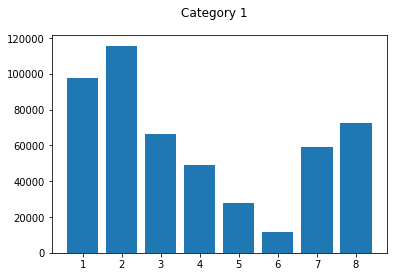

In [13]:
plt.bar(data_pd['category1'].unique(), data_pd['category1'].value_counts(sort = False))
plt.suptitle('Category 1')

## Categoria 2

Text(0.5, 0.98, 'Category 2')

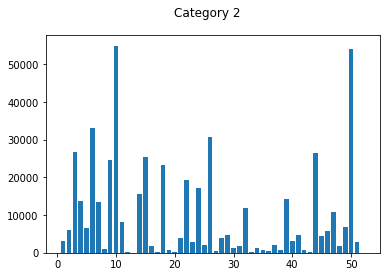

In [14]:
plt.bar(data_pd['category2'].unique(), data_pd['category2'].value_counts(sort = False))
plt.suptitle('Category 2')

## Categoria 3

In [15]:
data_pd['category3'].value_counts(sort = True).index

CategoricalIndex([2.0, 1.0, 8.0, 7.0, 4.0, 6.0, 3.0, 5.0], categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], ordered=False, dtype='category')

Text(0.5, 0.98, 'Category 3')

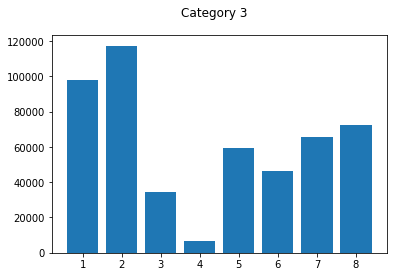

In [16]:
plt.bar(data_pd['category3'].unique(), data_pd['category3'].value_counts(sort = False))
plt.suptitle('Category 3')

### Preço recomendado

Text(0.5, 0.98, 'recommendedRetailPrice')

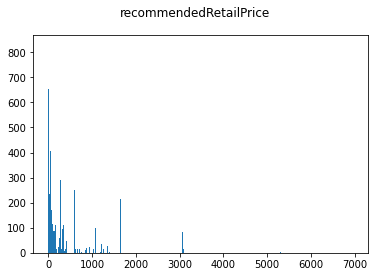

In [17]:
plt.bar(data_pd['recommendedRetailPrice'].unique(), data_pd['recommendedRetailPrice'].value_counts(sort = False))
plt.suptitle('recommendedRetailPrice')

In [18]:
data_pd['recommendedRetailPrice'].max()

6955.0

In [19]:
data_pd['recommendedRetailPrice'].min()

2.46

In [20]:
data_pd['recommendedRetailPrice'].value_counts(sort = True)

11.48    826
13.41    777
9.52     762
8.69     743
8.90     742
        ... 
93.36      1
19.10      1
27.81      1
5.19       1
95.14      1
Name: recommendedRetailPrice, Length: 14465, dtype: int64

In [ ]:
data_pd['salesPrice'].max()

In [21]:
data_pd[data_pd['salesPrice'].rank(pct = True) > 0.99]

itemID  brand manufacturer  customerRating category1 category2  \
26         538    0.0         16.0             0.0       1.0       1.0   
240       8754  178.0        225.0             0.0       8.0      44.0   
242       8769  178.0        225.0             5.0       8.0      44.0   
244       8788  178.0        225.0             5.0       8.0      44.0   
250       8939  178.0        225.0             4.0       8.0      44.0   
...        ...    ...          ...             ...       ...       ...   
499774   10384  196.0        235.0             0.0       8.0      44.0   
499887    4712    0.0        118.0             0.0       6.0      18.0   
499995     873    0.0         22.0             0.0       1.0       1.0   
500268    9007  178.0        225.0             0.0       8.0      44.0   
500274    9377  180.0        128.0             0.0       8.0      44.0   

       category3  recommendedRetailPrice  orders_coef  salesPrice_coef  \
26           1.0                 1400.42     0.000000         0.000000   
240          8.0                 2902.50     0.000000         0.000000   
242          8.0                 1242.60     0.000000         0.000000   
244          8.0                 3289.00     0.000000         0.000000   
250          8.0                 1168.00     0.000000         0.000000   
...          ...                     ...          ...              ...   
499774       8.0                 1751.33     0.000000         0.000000   
499887       3.0                 1328.67    -1.107143        -0.053447   
499995       1.0                 3088.97     0.000000         0.000000   
500268       8.0                 1020.00     0.000000         0.000000   
500274       8.0                 1875.87    -0.535714         0.000000   

        ordersInLW  meanSalesPrice  minSalesPriceLW  maxSalesPriceLW  \
26             0.0        1.000000         1.000000         1.000000   
240            0.0        1.000000         1.000000         1.000000   
242            0.0        1.000000         1.000000         1.000000   
244            0.0        1.000000         1.000000         1.000000   
250            0.0        1.000000         1.000000         1.000000   
...            ...             ...              ...              ...   
499774         0.0        1.000000         1.000000         1.000000   
499887        43.0        1.740481         1.712065         1.768897   
499995         0.0        1.000000         1.000000         1.000000   
500268         0.0        1.000000         1.000000         1.000000   
500274         5.0        2.190658         2.190658         2.190658   

        salesPrice  salesInBlock  
26         1484.16             1  
240        5609.66             5  
242        1666.74             4  
244        6725.68             5  
250        2489.71             3  
...            ...           ...  
499774     1585.24            17  
499887     2103.26             1  
499995     3635.40             1  
500268     1848.87             1  
500274     4111.80             2  

[5009 rows x 16 columns]

## Vendas no bloco

(0.0, 1000.0)

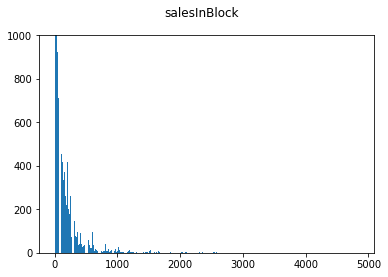

In [22]:
plt.bar(data_pd['salesInBlock'].value_counts(sort = False).index, data_pd['salesInBlock'].value_counts(sort = False))
plt.suptitle('salesInBlock')
plt.ylim(top=1000) 

In [23]:
data_pd['salesInBlock'].max()

4847

In [24]:
data_pd['salesInBlock'].min()

1

In [25]:
data_pd['salesInBlock'].value_counts(sort = True)

1       123960
2        58813
3        33234
4        22543
5        16261
         ...  
1435         1
1946         1
1690         1
3483         1
2049         1
Name: salesInBlock, Length: 2051, dtype: int64

In [26]:
data_pd[data_pd['salesInBlock'] >= 1000]['recommendedRetailPrice']

50         9.52
91        16.24
93        26.68
95         9.04
96         5.78
          ...  
499107     3.86
499254     6.64
499255    11.14
499699     6.64
499902     5.90
Name: recommendedRetailPrice, Length: 3935, dtype: float64

In [27]:
data_pd[data_pd['salesInBlock'] >= 1000]['recommendedRetailPrice'].max()

77.75999999999794

In [28]:
data_pd[data_pd['salesInBlock'] >= 1000]['recommendedRetailPrice'].mean()

14.195527318932639

In [29]:
data_pd[data_pd['salesInBlock'] < 1000]

itemID  brand manufacturer  customerRating category1 category2  \
0           29    0.0         12.0             4.6       1.0       6.0   
1           35    0.0          5.0             5.0       1.0       1.0   
2           38    0.0          3.0             0.0       1.0       6.0   
3           40    0.0          6.0             4.0       1.0       5.0   
4           42    0.0          5.0             1.0       1.0       4.0   
...        ...    ...          ...             ...       ...       ...   
500300   10334  231.0        245.0             5.0       8.0      44.0   
500301   10336  231.0        245.0             0.0       8.0      44.0   
500302   10392  268.0        229.0             0.0       8.0      43.0   
500303   10431  180.0        128.0             5.0       8.0      44.0   
500304   10449  180.0        128.0             0.0       8.0      44.0   

       category3  recommendedRetailPrice  orders_coef  salesPrice_coef  \
0            1.0                   29.19     0.000000         0.000000   
1            1.0                  173.86   -54.785714        -0.022000   
2            1.0                   20.28     0.035714        -0.530220   
3            1.0                  442.51     0.000000        -0.253244   
4            1.0                   28.48     0.000000         0.000000   
...          ...                     ...          ...              ...   
500300       8.0                  230.34     0.000000         0.000000   
500301       8.0                  366.45     0.000000         0.000000   
500302       8.0                   11.47     0.000000         0.000000   
500303       8.0                  214.59    -5.464286         0.000000   
500304       8.0                  161.50    -1.285714         0.031446   

        ordersInLW  meanSalesPrice  minSalesPriceLW  maxSalesPriceLW  \
0              0.0        1.000000         1.000000         1.000000   
1            550.0        2.083170         2.014724         2.117393   
2              1.0        1.525641         1.525641         1.525641   
3              9.0        1.818196         1.818196         1.818196   
4              0.0        1.000000         1.000000         1.000000   
...            ...             ...              ...              ...   
500300         0.0        1.000000         1.000000         1.000000   
500301         0.0        1.000000         1.000000         1.000000   
500302         0.0        1.000000         1.000000         1.000000   
500303        51.0        1.162589         1.162589         1.162589   
500304        14.0        1.069040         1.020124         1.166873   

        salesPrice  salesInBlock  
0        56.130000             4  
1       350.280000           173  
2        30.940000           164  
3       809.710000             5  
4        17.720000             3  
...            ...           ...  
500300   27.752727            11  
500301  127.230000            10  
500302    6.800000             1  
500303  249.480000            19  
500304  188.450000            52  

[496370 rows x 16 columns]

In [30]:
data_pd = data_pd.sort_values(by=['salesInBlock'])

In [31]:
data_pd['salesInBlock'].rank(pct = True)

111367    0.123885
127036    0.123885
127037    0.123885
127038    0.123885
127039    0.123885
            ...   
379412    0.999992
348552    0.999994
383029    0.999996
352806    0.999998
344361    1.000000
Name: salesInBlock, Length: 500305, dtype: float64

In [32]:
data_pd[data_pd['salesInBlock'].rank(pct = True) > 0.99]

itemID  brand manufacturer  customerRating category1 category2  \
55537     5130   92.0         80.0            4.71       5.0      21.0   
183323    6645   93.0        137.0            5.00       7.0      23.0   
51282     5130   92.0         80.0            4.71       5.0      21.0   
209324    8302  112.0        128.0            5.00       4.0      39.0   
57276     5130   92.0         80.0            4.71       5.0      21.0   
...        ...    ...          ...             ...       ...       ...   
379412    4227    0.0         70.0            2.13       6.0      18.0   
348552    4227    0.0         70.0            2.13       6.0      18.0   
383029    4227    0.0         70.0            2.13       6.0      18.0   
352806    4227    0.0         70.0            2.13       6.0      18.0   
344361    4227    0.0         70.0            2.13       6.0      18.0   

       category3  recommendedRetailPrice  orders_coef  salesPrice_coef  \
55537        4.0                   17.76    -0.107143     0.000000e+00   
183323       6.0                   20.80     0.000000     0.000000e+00   
51282        4.0                   17.76     0.107143     1.646356e-01   
209324       7.0                   24.68     0.000000     0.000000e+00   
57276        4.0                   17.76    -0.178571     1.646356e-01   
...          ...                     ...          ...              ...   
379412       3.0                    3.80    -1.892857     3.469447e-18   
348552       3.0                    3.80     0.928571     9.912706e-19   
383029       3.0                    3.80    -2.285714     2.973812e-18   
352806       3.0                    3.80     0.285714    -9.912706e-19   
344361       3.0                    3.80     0.035714     2.973812e-18   

        ordersInLW  meanSalesPrice  minSalesPriceLW  maxSalesPriceLW  \
55537          6.0        2.536599         2.536599         2.536599   
183323         0.0        1.000000         1.000000         1.000000   
51282          6.0        2.536599         2.536599         2.536599   
209324         0.0        1.000000         1.000000         1.000000   
57276          5.0        2.536599         2.536599         2.536599   
...            ...             ...              ...              ...   
379412        27.0        0.086842         0.086842         0.086842   
348552        34.0        0.086842         0.086842         0.086842   
383029        23.0        0.086842         0.086842         0.086842   
352806        37.0        0.086842         0.086842         0.086842   
344361        35.0        0.086842         0.086842         0.086842   

        salesPrice  salesInBlock  
55537    35.792857           861  
183323   15.430480           861  
51282    37.644286           861  
209324   32.230000           861  
57276    35.792857           861  
...            ...           ...  
379412    1.167714          4835  
348552    0.864643          4839  
383029    1.166104          4841  
352806    0.967143          4846  
344361    0.805238          4847  

[5002 rows x 16 columns]

In [33]:
x = data_pd[data_pd['itemID'] == 4227]

## Preço médio de venda no bloco

(0.0, 1000.0)

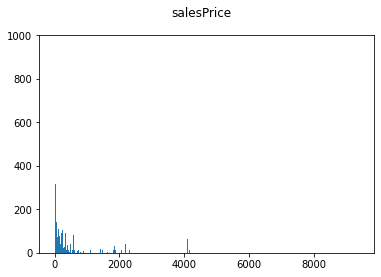

In [34]:
plt.bar(data_pd['salesPrice'].value_counts(sort = False).index, data_pd['salesPrice'].value_counts(sort = False))
plt.suptitle('salesPrice')
plt.ylim(top=1000) 

In [35]:
data_pd['salesPrice'].min()

0.0

In [36]:
data_pd['salesPrice'].max()

9387.02

In [37]:
end_date = start_date + timedelta(days=14)

NameError: name 'start_date' is not defined

In [ ]:
end_date.day

In [ ]:
data_pd